importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/Users/vinittyagi/Desktop/python-base/cars/cars_2010_2020.csv')

In [4]:
df.head(5)

,Make,Model,Year,Engine Size (L),Fuel Type,Price (USD)
0,Volkswagen,Jetta,2010,4.2,Petrol,54073.09
1,Honda,Pilot,2017,4.2,Hybrid,44924.91
2,Nissan,Murano,2011,4.2,Hybrid,76963.44
3,Toyota,RAV4,2010,2.4,Petrol,30871.25
4,Nissan,Altima,2010,3.6,Petrol,72037.65


Exploratory Data analysis

top 10 cars with the highest prices

In [5]:
top_10=df.sort_values(by='Price (USD)',ascending=False).head(10)
top_10

,Make,Model,Year,Engine Size (L),Fuel Type,Price (USD)
6446,Hyundai,Sonata,2011,4.7,Diesel,79998.87
6513,Toyota,RAV4,2013,1.4,Diesel,79994.55
1686,Chevrolet,Malibu,2011,2.4,Hybrid,79992.17
6348,Volkswagen,Atlas,2010,4.3,Electric,79978.02
2540,Audi,A3,2010,4.1,Diesel,79973.56
4246,Audi,A6,2016,2.3,Petrol,79969.78
729,Toyota,Highlander,2018,3.9,Electric,79956.97
3607,Mercedes-Benz,GLA,2013,2.8,Petrol,79948.67
9979,BMW,7 Series,2019,4.1,Diesel,79948.44
2337,Hyundai,Kona,2013,1.7,Diesel,79936.83


plotting using bar chart

/var/folders/jk/v9664mmj7334qvdl4t3srv840000gn/T/ipykernel_52637/3311742794.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10['Make'],y=top_10['Price (USD)'],palette='magma')


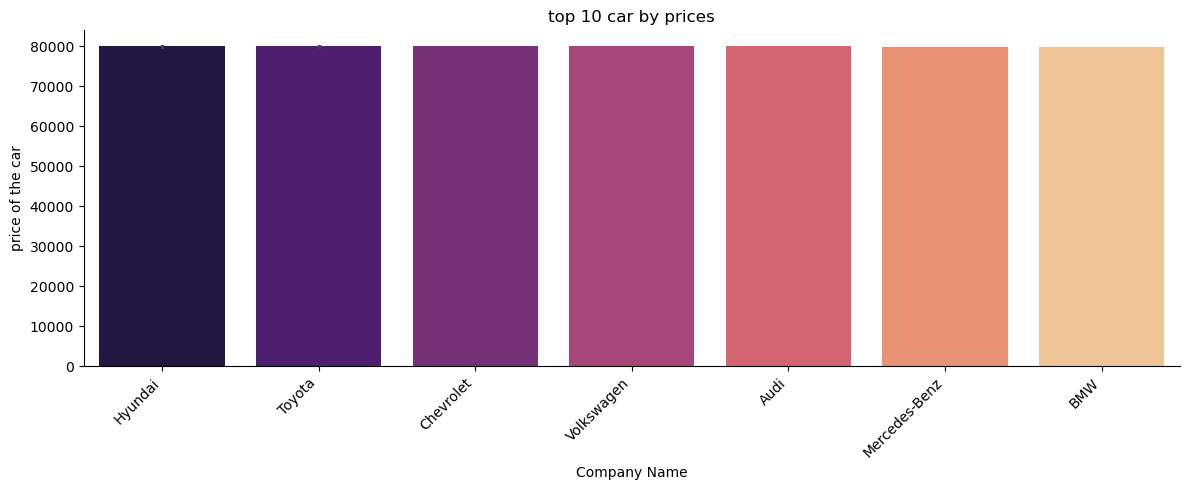

In [26]:
f, ax = plt.subplots(figsize=(12, 5))
sns.despine(f)
sns.barplot(x=top_10['Make'],y=top_10['Price (USD)'],palette='magma')
plt.xlabel("Company Name")
plt.ylabel("price of the car")
plt.title("top 10 car by prices")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

Hyundai has the highest price car

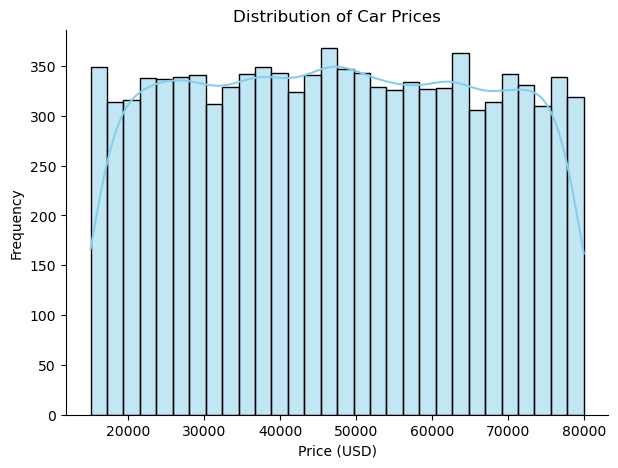

In [30]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
sns.histplot(df['Price (USD)'],bins=30,kde=True,color='skyblue')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of Car Prices')
plt.show()


Displays the number of car models each company produces.

/var/folders/jk/v9664mmj7334qvdl4t3srv840000gn/T/ipykernel_52637/3542006412.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Make', y='Model', data=model_counts_df, palette='viridis')


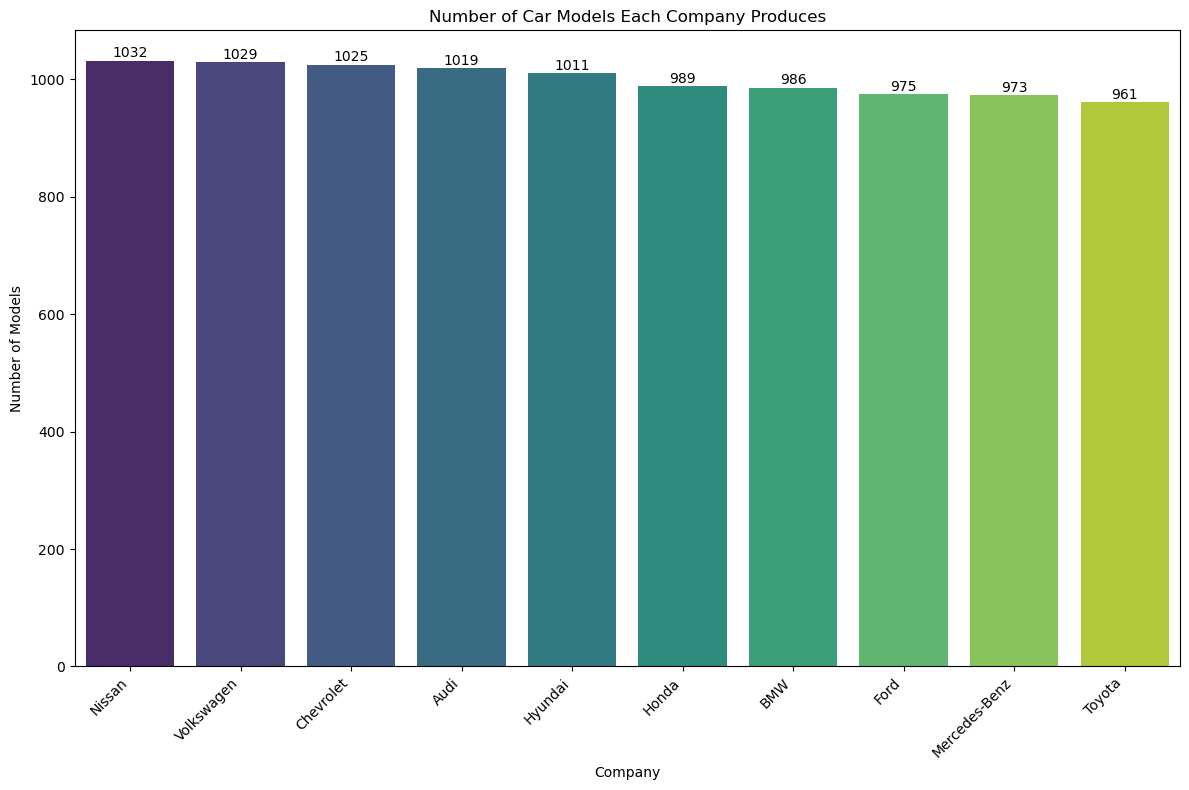

In [34]:
model_counts = df['Make'].value_counts()

model_counts_df = model_counts.reset_index()
model_counts_df.columns = ['Make', 'Model']

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Make', y='Model', data=model_counts_df, palette='viridis')
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.5,  
        f'{int(height)}', 
        ha='center',
        va='bottom'
    )
plt.xlabel('Company')
plt.ylabel('Number of Models')
plt.title('Number of Car Models Each Company Produces')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

Nissan company produced the most number of models

Compares the average price of cars across different companies.

In [41]:
avg_price=df.groupby('Make')["Price (USD)"].mean().reset_index()
avg_price = avg_price.sort_values(by='Price (USD)', ascending=False)
avg_price


,Make,Price (USD)
9,Volkswagen,48047.993955
6,Mercedes-Benz,47984.364810
7,Nissan,47943.220320
2,Chevrolet,47736.445746
4,Honda,47424.814671
1,BMW,47351.470456
3,Ford,47021.226482
0,Audi,46980.565289
5,Hyundai,46881.563640
8,Toyota,46545.861124


/var/folders/jk/v9664mmj7334qvdl4t3srv840000gn/T/ipykernel_52637/3705397099.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Make', y='Price (USD)', data=avg_price, palette='viridis')


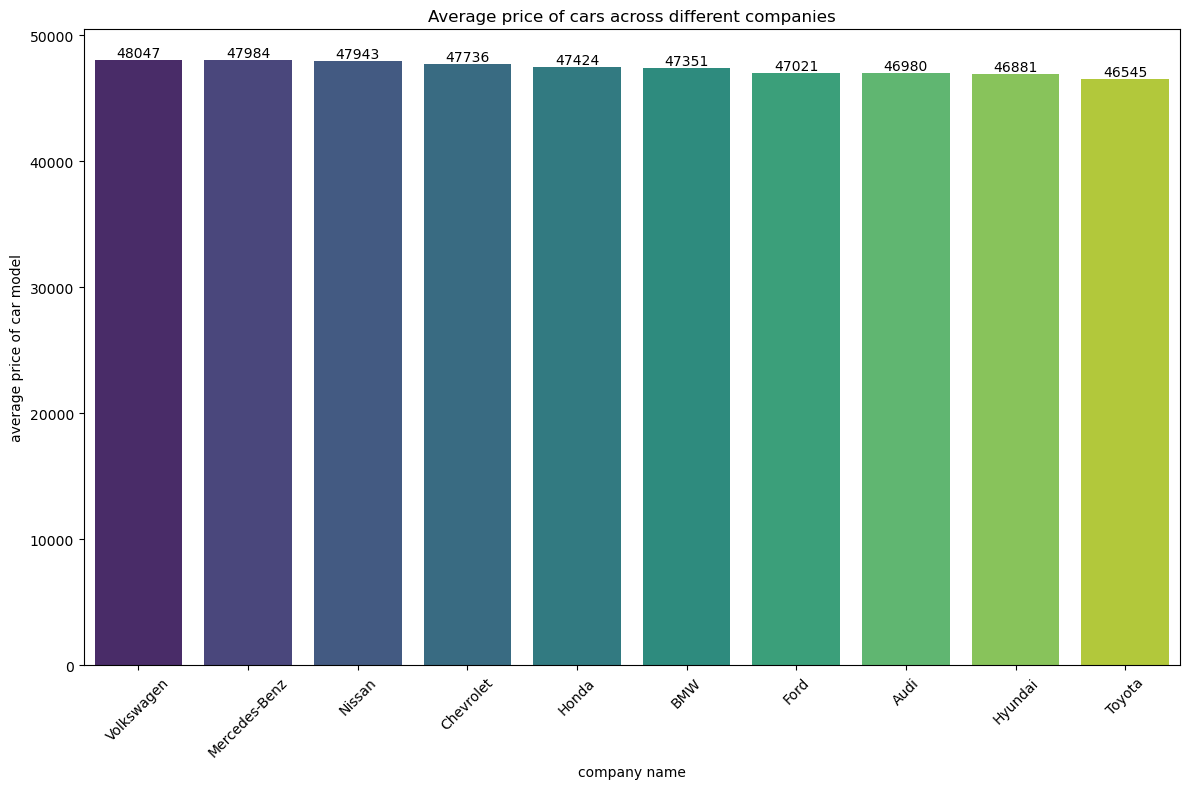

In [58]:
f,ax=plt.subplots(figsize=(12,8))
ax = sns.barplot(x='Make', y='Price (USD)', data=avg_price, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel("company name")
plt.ylabel("average price of car model")
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.5,  
        f'{int(height)}', 
        ha='center',
        va='bottom'
    )
    plt.title("Average price of cars across different companies")
    plt.tight_layout()


we can see from above that the volkswagen company has the highest average price 

Analyzes the trend in average car prices over the years.

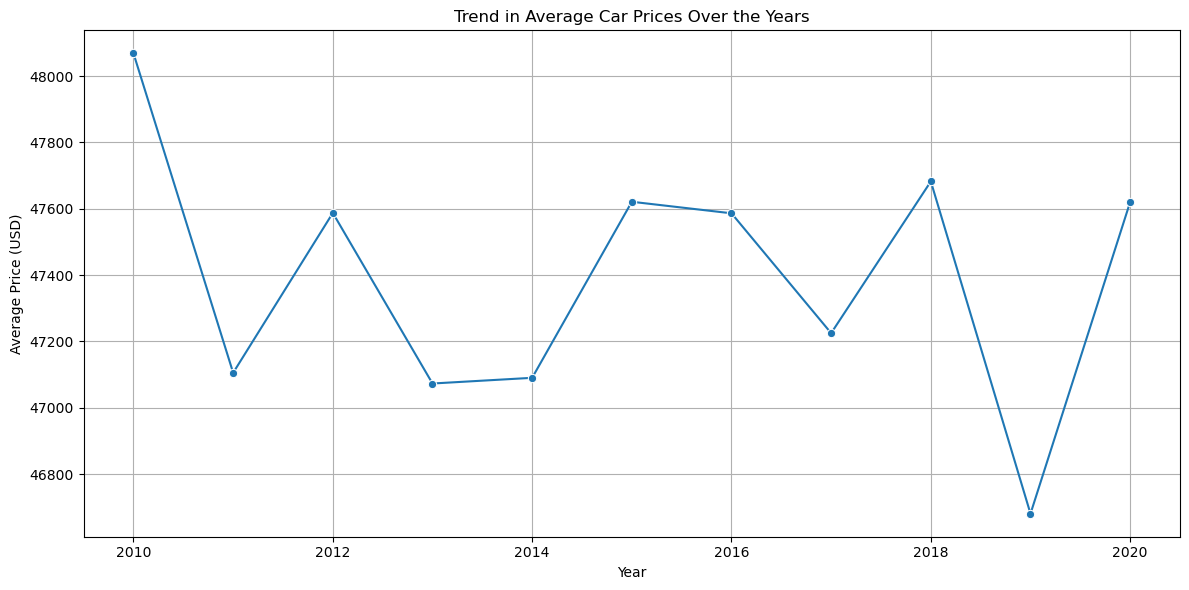

In [68]:
avg_price1=df.groupby('Year')["Price (USD)"].mean().reset_index()
avg_price1 = avg_price.sort_values(by='Price (USD)', ascending=False)
avg_price1
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Price (USD)', data=avg_price1, marker='o')
plt.title('Trend in Average Car Prices Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Price (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

we can see that the average price of cars was highest in 2010  and it is declined in 2020

Analyzes the distribution of engine sizes among the cars.


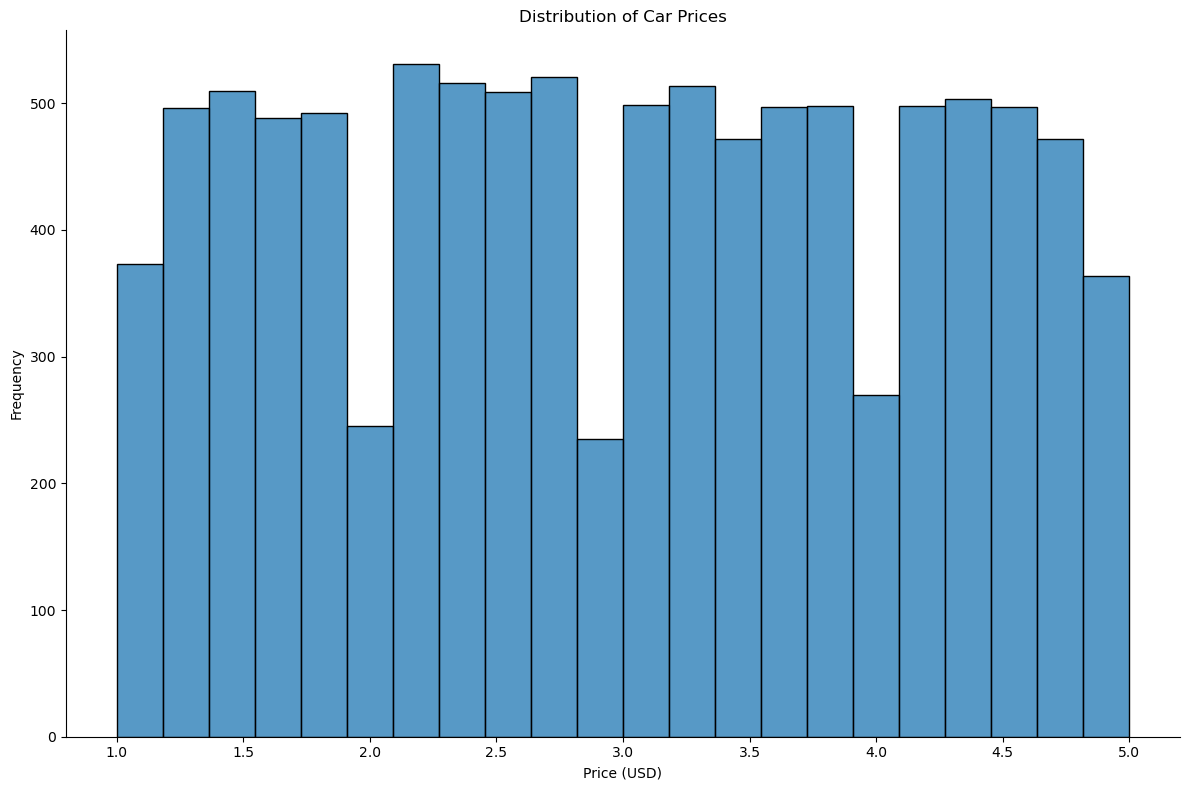

In [74]:
f, ax = plt.subplots(figsize=(12, 8))
sns.despine(f)
sns.histplot(df['Engine Size (L)'], kde=False)
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of Car Prices')
plt.tight_layout()
plt.show()


Compares the average price of cars with different engine sizes.

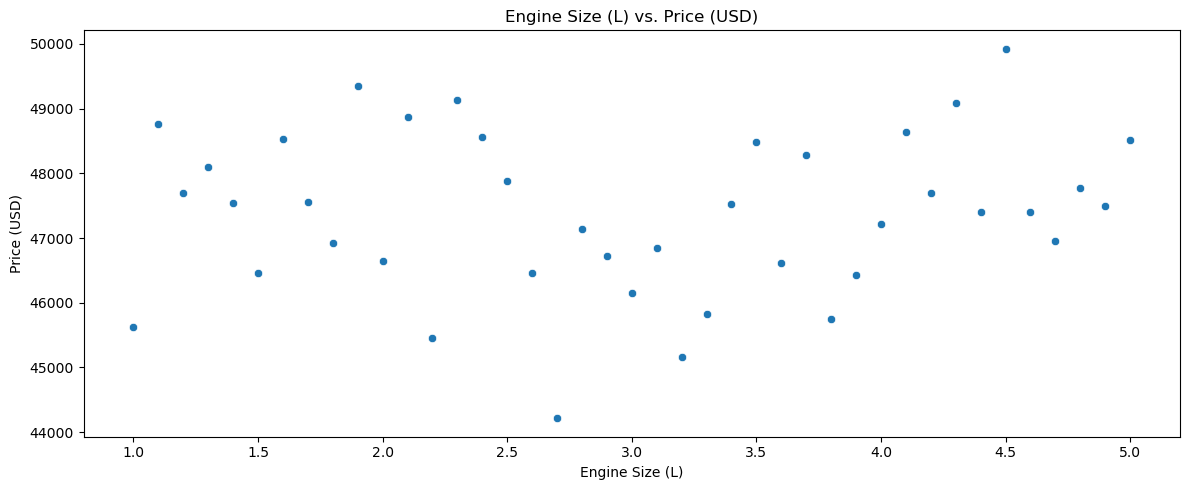

In [82]:
avg_price2=df.groupby('Engine Size (L)')["Price (USD)"].mean().reset_index()
avg_price2 = avg_price2.sort_values(by='Price (USD)', ascending=False)
f,ax=plt.subplots(figsize=(12,5))
sns.scatterplot(x='Engine Size (L)', y='Price (USD)', data=avg_price2)
plt.title('Engine Size (L) vs. Price (USD)')
plt.tight_layout()


Shows the distribution of different fuel types among the cars.

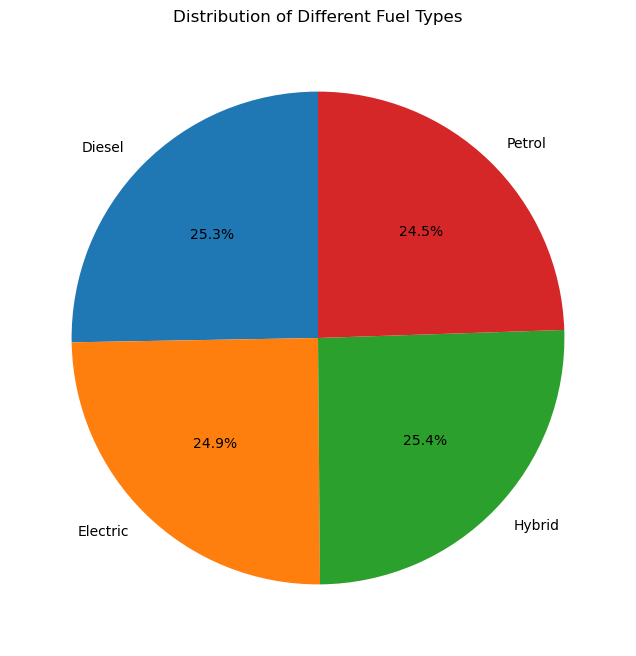

<Figure size 640x480 with 0 Axes>

In [101]:
count=df.groupby('Fuel Type')['Make'].count().reset_index()
plt.figure(figsize=(8, 8))
plt.pie(count['Make'], labels=count['Fuel Type'], autopct='%1.1f%%', shadow=False, startangle=90)
plt.title('Distribution of Different Fuel Types')
plt.show()
plt.tight_layout()


We can conclude that both Diesel and Hybrid share equal proportion but Hybrid have little edge over the petrol fuel type

Compares the average price of cars with different fuel types.

/var/folders/jk/v9664mmj7334qvdl4t3srv840000gn/T/ipykernel_52637/1637393631.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Fuel Type', y='Price (USD)', data=avg, palette='rocket')


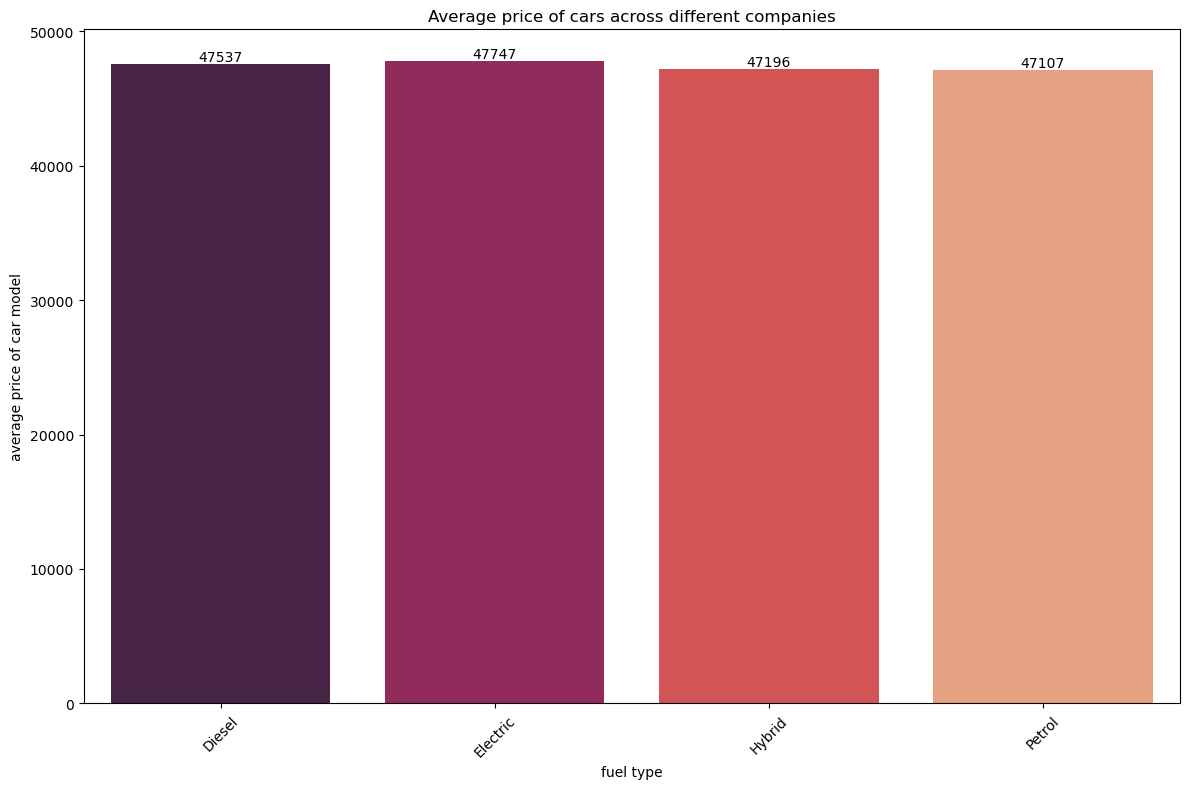

In [121]:
avg=df.groupby('Fuel Type')['Price (USD)'].mean().reset_index()
avg.sort_values(by='Price (USD)',ascending=False)
f,ax=plt.subplots(figsize=(12,8))
ax = sns.barplot(x='Fuel Type', y='Price (USD)', data=avg, palette='rocket')
plt.xticks(rotation=45)
plt.xlabel("fuel type")
plt.ylabel("average price of car model")
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.5,  
        f'{int(height)}', 
        ha='center',
        va='bottom'
    )
    plt.title("Average price of cars across different companies")
    plt.tight_layout()


Top model produce by each company

In [135]:
df['Make'] = df['Make'].astype(str)
df['Model'] = df['Model'].astype(str)

model_counts = df.groupby(['Make', 'Model']).size().reset_index(name='Count')
top_models = model_counts.loc[model_counts.groupby('Make')['Count'].idxmax()]

top_models = top_models.sort_values(by='Make').reset_index(drop=True)

print(top_models)

            Make       Model  Count
0           Audi          Q7    215
1            BMW    5 Series    220
2      Chevrolet       Spark    226
3           Ford      Fiesta    207
4          Honda         Fit    206
5        Hyundai        Kona    213
6  Mercedes-Benz     E-Class    214
7         Nissan      Sentra    226
8         Toyota  Highlander    204
9     Volkswagen        Golf    224


#### Conclusion from this report

1) Hyundai have the highest car price car 
2) In this data highest number of car models are in the range of 4000-5000 usd .
3) Nissan has produce the highest car models followed by volkswagen
4) volkswagen has the highest average car price 
5) Hybrid models have the highest distribution followed by Diesel 
6) engine size of 2.0-2.5 have the highest price 